# Airbnb Dataset
## Exploratory Data Analysis
### Alfonso Esqueda

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('airbnb.csv')
df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0


In [5]:
#Quick EDA

print ("Dataset Column Names")
print(df.columns)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Dataset Data Types")
print(df.dtypes)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Missing Values")
print(df.columns[df.isnull().any()].tolist())
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print("Dataset Dimension")
print(df.shape)
print("~~~~~~~~~~~~~~~~~~")

Dataset Column Names
Index(['id_visitor', 'id_session', 'dim_session_number', 'dim_user_agent',
       'dim_device_app_combo', 'ds', 'ts_min', 'ts_max', 'did_search',
       'sent_message', 'sent_booking_request', 'next_id_session',
       'next_dim_session_number', 'next_dim_user_agent',
       'next_dim_device_app_combo', 'next_ds', 'next_ts_min', 'next_ts_max',
       'next_did_search', 'next_sent_message', 'next_sent_booking_request'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~
Dataset Data Types
id_visitor                    object
id_session                    object
dim_session_number             int64
dim_user_agent                object
dim_device_app_combo          object
ds                            object
ts_min                        object
ts_max                        object
did_search                     int64
sent_message                   int64
sent_booking_request           int64
next_id_session               object
next_dim_session_number      float64
next_dim_u

All of the datatypes above inclde objects, integers and floats. The Ids are in the correct form of datatype because there is no need for arithmetic functions performed on these variables.

There are missing values for 11 columns which will need sometype of imputation.

In [15]:
df.describe().round(2)

,dim_session_number,did_search,sent_message,sent_booking_request,next_dim_session_number,next_did_search,next_sent_message,next_sent_booking_request
count,7756.00,7756.00,7756.00,7756.00,7126.00,7126.00,7126.00,7126.00
mean,98.09,0.16,0.16,0.02,106.68,0.15,0.18,0.02
std,131.53,0.37,0.37,0.14,133.88,0.35,0.38,0.14
min,1.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00
25%,11.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00
50%,46.00,0.00,0.00,0.00,56.00,0.00,0.00,0.00
75%,128.00,0.00,0.00,0.00,140.75,0.00,0.00,0.00
max,702.00,1.00,1.00,1.00,702.00,1.00,1.00,1.00


In [9]:
#Count of missing values 
df.isnull().sum()

id_visitor                     0
id_session                     0
dim_session_number             0
dim_user_agent               219
dim_device_app_combo           0
ds                             0
ts_min                         0
ts_max                         0
did_search                     0
sent_message                   0
sent_booking_request           0
next_id_session              630
next_dim_session_number      630
next_dim_user_agent          829
next_dim_device_app_combo    630
next_ds                      630
next_ts_min                  630
next_ts_max                  630
next_did_search              630
next_sent_message            630
next_sent_booking_request    630
dtype: int64

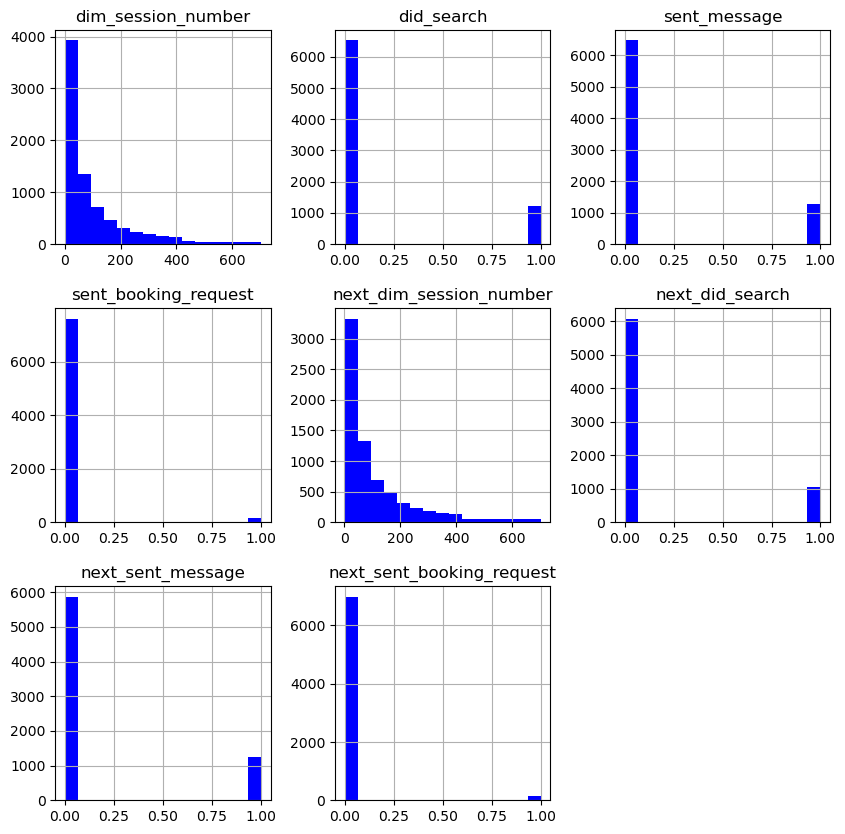

In [14]:
#Histogram of the numerical variables
df.hist(bins=15,figsize= (10,10), color='blue')
plt.show()

The histogram depicts the distribution of all the numerical variables of the dataset, which is found to be right-skewed. This means that there are more data points on the left-hand side of the histogram and fewer data points on the right-hand side.






In [ ]:
# 1. Which app is used the most? 
# 2. The relation between used app and booking, sending message
# 3. time spent on the airbnb app on average?


In [18]:
device = df['dim_device_app_combo'].value_counts()
device

iPhone - iOS                2130
Desktop - Chrome            1181
iPhone - Web                 944
Android Phone - Android      451
Desktop - Safari             443
iPhone - Moweb               429
Desktop - IE                 429
iPad - Web                   413
Desktop - Firefox            327
Android Tablet - Web         299
Other - Other                267
Unknown - Moweb              122
iPad - iOS                   121
Android Phone - Web          112
Android Phone - Moweb         72
Android Tablet - Android      14
Android Tablet - Moweb         2
Name: dim_device_app_combo, dtype: int64

<Axes: >

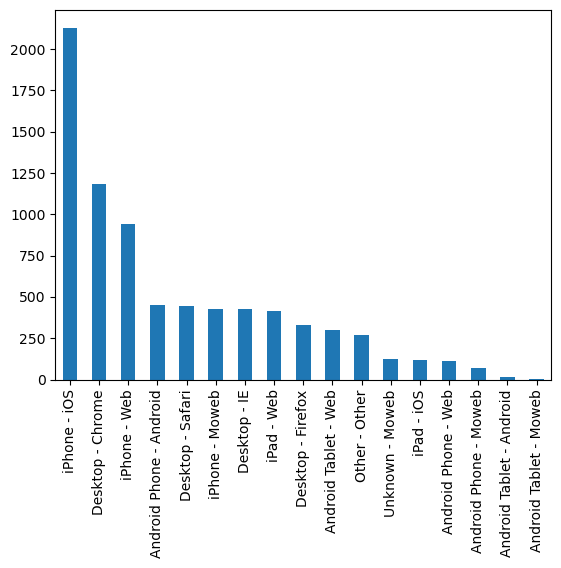

In [22]:
#1
#Iphone - IOS is the most common device
device.plot.bar(x='device', y='val', rot=90)

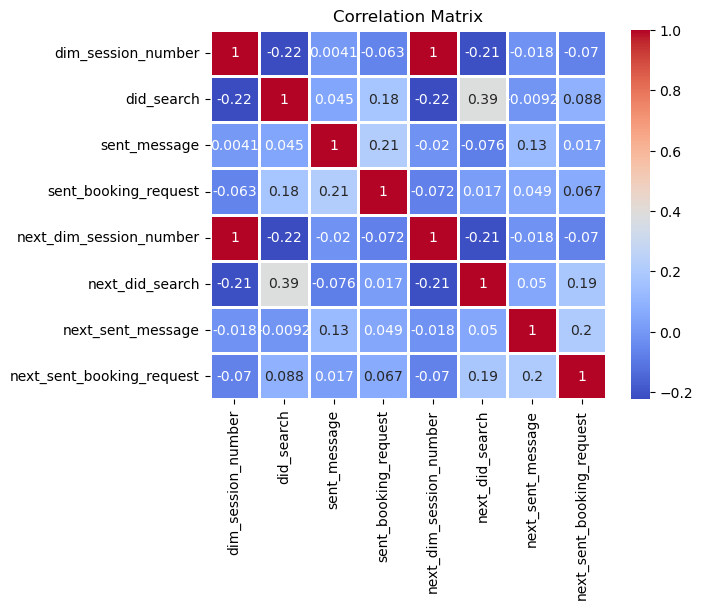

In [23]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=2)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows the strength and direction of the relationship between each pair of variables, with values ranging from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, while a coefficient of -1 indicates a perfect negative correlation. A coefficient of 0 indicates no correlation. A correlation matrix can help identify which variables are strongly related to each other, which can inform feature selection and modeling decisions.

,dim_session_number,did_search,sent_message,sent_booking_request,next_dim_session_number,next_did_search,next_sent_message,next_sent_booking_request
dim_device_app_combo,,,,,,,,
iPhone - iOS,298467,253,373,19,298711.0,258.0,270.0,32.0
Desktop - Chrome,58199,319,272,56,57681.0,217.0,206.0,40.0
Desktop - IE,33478,93,133,11,32691.0,62.0,111.0,7.0
Android Tablet - Web,44598,18,101,1,44465.0,11.0,97.0,1.0
Desktop - Safari,18682,170,98,19,18449.0,95.0,72.0,13.0
Android Phone - Android,21202,81,87,6,21163.0,77.0,85.0,9.0
Desktop - Firefox,9731,125,75,20,9742.0,86.0,59.0,16.0
iPad - Web,11329,99,44,5,11299.0,77.0,61.0,6.0
iPhone - Moweb,66606,5,27,2,66896.0,20.0,30.0,2.0


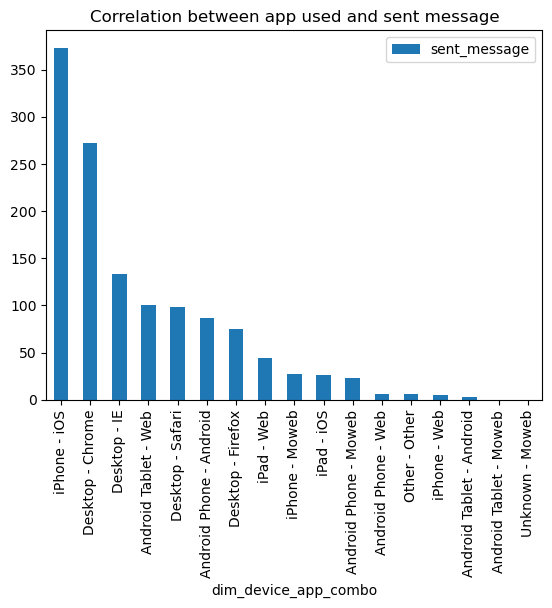

In [25]:
#2
sending = df.groupby('dim_device_app_combo').sum()
sending.sort_values("sent_message",ascending= False, inplace= True)
sending.plot.bar(y='sent_message', title='Correlation between app used and sent message')
sending

In [26]:
df['ts_min']=pd.to_datetime(df['ts_min'])
df['ts_max']=pd.to_datetime(df['ts_max'])

By converting the values to datetime format, the data in these columns can be used for datetime operations such as plotting time-series data or filtering data based on dates and times.

<Axes: title={'center': 'Average time spent per device in seconds'}, xlabel='dim_device_app_combo'>

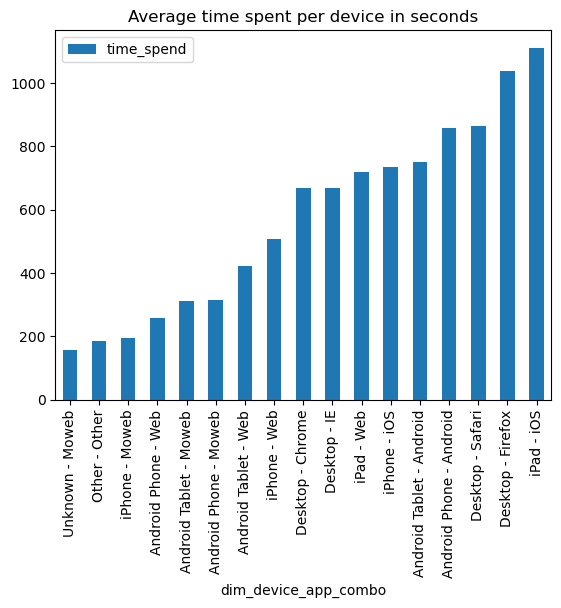

In [28]:
#3
df['time_spend']=df['ts_max']-df['ts_min']
df['time_spend']=df['time_spend'] .dt.total_seconds()
time_spend= sending = df.groupby('dim_device_app_combo').mean().sort_values('time_spend')
time_spend.plot.bar(y='time_spend', title='Average time spent per device in seconds')